In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#!ln -s /content/gdrive/My\ Drive/ /mydrive

In [ ]:
%cd /content/gdrive/MyDrive/MinorProject

/content/gdrive/MyDrive/MinorProject


In [ ]:
# dot wnload darknet folder - for windows use darknet of AlexeyAB and for linux download darknet of pjreddie
# uncomment the below line to download darknet folder. I already have so commented it

!giclone https://github.com/AlexeyAB/darknet

/bin/bash: giclone: command not found


Changes to do in yolov4 architecture as per your dataset Open darknet folder -> cfg folder -> yolov4-tiny.cfg (Delete everything else)

change batch=1 from batch=64

change subdivisions=1 from subdivisions=16

width=608 #416 height=608 #416

Next is max_batches.This parameter is very very important.The thing to remember here is that minimum batch value would be 6000 ( if you have 1 class or 2 classes or 3 classes.)

#### In our case we have 4 classes. So max_batches would be 4*2000 = 8000 i.e 8000 would be the max_batches.

#### Steps are also important. There are 2 steps:Ist step should be 90% of the max_batch value. And 2nd step would be the 80% of the max_batch
#### steps are steps=7200,6400  (90% of 8000 and 80% of 8000)


Steps are also important. There are 2 steps:Ist step should be 90% of the max_batch value. And 2nd step would be the 80% of the max_batch steps are steps=5400,4800 (90% of 6000 and 80% of 6000)

We have 3 YOLO layers for 3 different scales.

Showing you a demo below. Just see the [Yolo] layer. Above [YOLO] layer, we have [convolutional] layer. Change the number of filters as per your output classes as per this calculation (classes+5)3 = (2+5)3 = 21

In [ ]:
# Upload your dataset folder inside a data folder of darknet.

# Now let's dicide our dataset in train and tes using below script


import glob
import os
import numpy as np
import sys

current_dir = "/content/gdrive/MyDrive/MinorProject/darknet/data/ts/"
split_pct = 10;
file_train = open("darknet/data/train.txt", "w")  
file_val = open("darknet/data/test.txt", "w")  
counter = 1  
index_test = round(100 / split_pct)  
for pathAndFilename in glob.iglob(os.path.join(current_dir, "*.jpg")):  
        title, ext = os.path.splitext(os.path.basename(pathAndFilename))
        if counter == index_test:
                counter = 1
                file_val.write(current_dir + "/" + title + '.jpg' + "\n")
        else:
                file_train.write(current_dir + "/" + title + '.jpg' + "\n")
                counter = counter + 1
file_train.close()
file_val.close()


In [ ]:
# Inside your data folder, you will train.txt and test.txt file now.
# Now create 2 files in data folder - obj.data and obj.names

IGKV_OAL_10.txt: 
0 0.5316584967320261 0.3046875 0.2659313725490196 0.2545955882352941

IGKV_OAL_1.txt: 
0 0.41891339869281047 0.5122549019607843 0.35661764705882354 0.25980392156862747

IGKV_OAL_0.txt: 
0 0.5359477124183006 0.41237745098039214 0.14787581699346405 0.2230392156862745

IGKV_OAL_16.txt: 
0 0.4520016339869281 0.5260416666666666 0.15236928104575165 0.15625



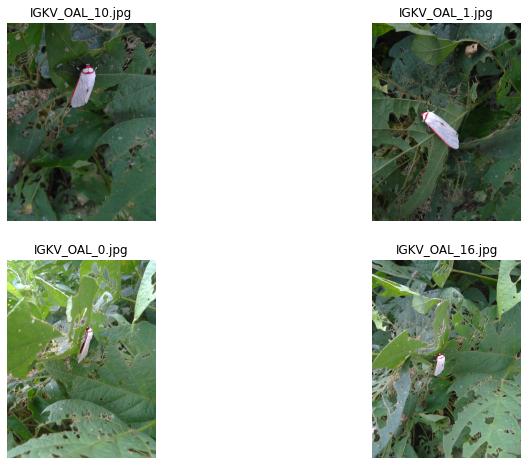

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob
import os

def read_label(image_path):
  file_name = image_path.replace('.jpg', '.txt')
  with open(file_name, 'rt') as file:
    print(os.path.basename(file_name) + ': \n' + file.read())

image_path = glob.glob("darknet/data/ts/*.jpg")
fig = plt.figure(figsize=(12,8))
cols = 2
rows = 2
grid = gridspec.GridSpec(nrows=rows, ncols=cols, figure=fig)
for i in range(cols*rows):
  fig.add_subplot(grid[i])
  image=plt.imread(image_path[i])
  plt.title(os.path.basename(image_path[i]))
  plt.axis(False)
  plt.imshow(image)
  read_label(image_path[i])

plt.savefig("dataset_examples.jpg", dpi=300)

In [ ]:
pwd

'/content/gdrive/MyDrive/MinorProject'

In [ ]:
# Here we use transfer learning. Instead of training a model from scratch, we use pre-trained YOLOv4 weights
# Run the following command to download the YOLOv4 pre-trained weights file.
%cd darknet/data/

#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.weights

/content/gdrive/MyDrive/MinorProject/darknet/data


In [ ]:
%cd ..

/content/gdrive/MyDrive/MinorProject/darknet


In [ ]:
#%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile




In [ ]:
!make


chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
!chmod +x ./darknet

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4-tiny-custom.cfg data/yolov4-tiny.weights -dont_show 

/bin/bash: ./darknet: No such file or directory


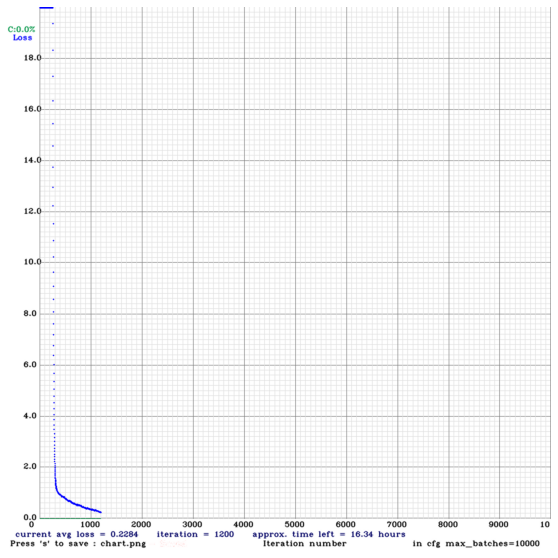

In [ ]:
#can check the performance of all the trained weights by looking at the chart.png file. However, the chart.png file only shows results if the training does not get interrupted i.e. if you do not get disconnected or lose your session. If you restart training from a saved point, this will not work.
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
imShow('chart.png')

In [ ]:
img_path = "/content/IGKV_OAL_47.jpg"
!./darknet detector test data/obj.data cfg/yolov4-tiny-custom_test.cfg data/yolov4-tiny-custom_last.weights {img_path} -dont-show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	    

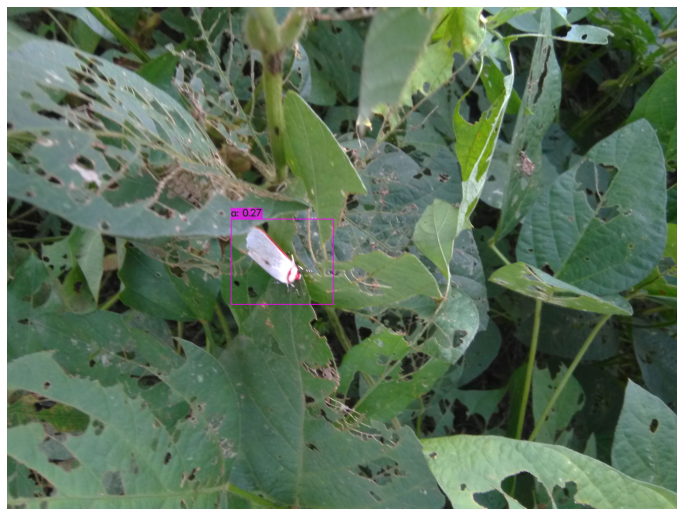

In [ ]:

import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(12,12))
plt.axis(False)
processed_image = plt.imread("./predictions.jpg")
plt.imshow(processed_image)

In [ ]:
img_path = "/content/IGKV_OLS_14.jpg"
!./darknet detector test data/obj.data cfg/yolov4-tiny-custom_test.cfg data/yolov4-tiny-custom_last.weights {img_path} -dont-show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	    

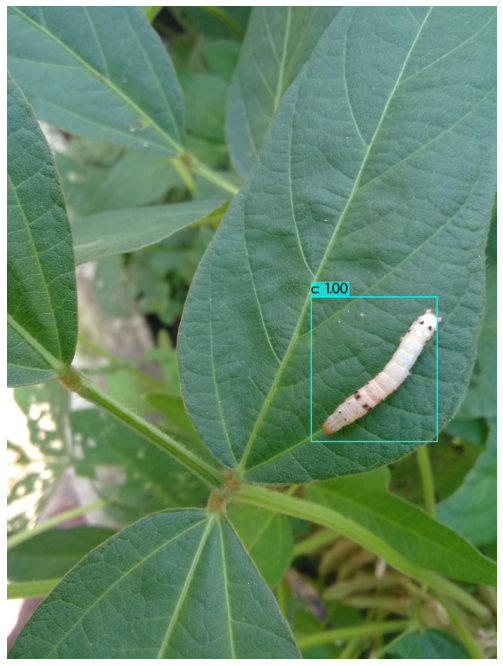

In [ ]:

import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(12,12))
plt.axis(False)
processed_image = plt.imread("./predictions.jpg")
plt.imshow(processed_image)